# Sentiment Analysis in Python (Donald Trump)

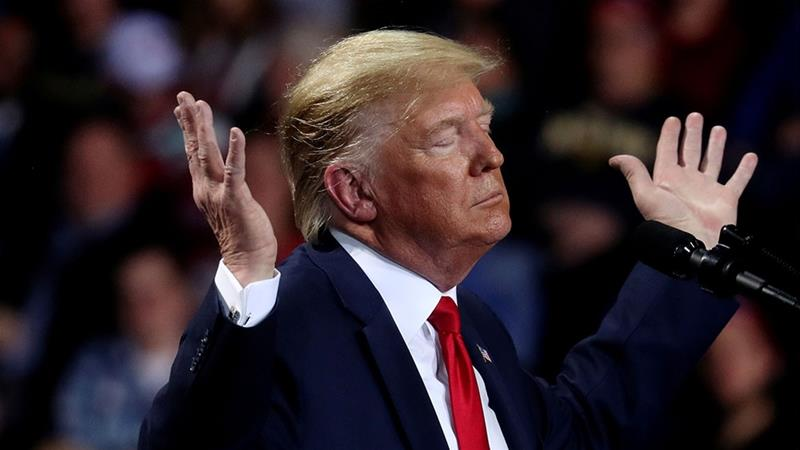

## libraries 

In [162]:
import re 
import tweepy 
from textblob import TextBlob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Tweeter API Authentication

In order to collect tweets, you need to have a Twitter Developer Account. If you don't have it, please Google it. I cannot share my key and token to others so I changed them as "XXX".

In [2]:
consumer_key = 'XXXXXX'
consumer_secret = 'XXX'
access_token = 'XXXX'
access_token_secret = 'XXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth) 

## Get tweets

I am going to get 10,000 tweets about "Donald Trump" and save it in my dataframe for future analysis.

In [3]:
def Get_tweets(query, count):
    i = 0
    df = pd.DataFrame(columns = ['Tweets', 'Username', 'Statuses_count', 
                             'Followers', 'Location', 'Verified',
                             'Favorite_count', 'Retweet_count', 'Created_at'])

    for tweet in tweepy.Cursor(api.search, q=query, count=100, lang='en').items():
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'Username'] = tweet.user.name
        df.loc[i, 'Statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'Followers'] = tweet.user.followers_count
        df.loc[i, 'Location'] = tweet.user.location
        df.loc[i, 'Verified'] = tweet.user.verified
        df.loc[i, 'Favorite_count'] = tweet.favorite_count
        df.loc[i, 'Retweet_count'] = tweet.retweet_count
        df.loc[i, 'Created_at'] = tweet.created_at

        i+=1
        if i >= count:
            print('Successfuly got',i,'tweets!')
            break
        else:
            pass
    return df

In [8]:
df = Get_tweets('Donald Trump Election',10000)

Successfuly got 10000 tweets!


In [9]:
df.head(50)

,Tweets,Username,Statuses_count,Followers,Location,Verified,Favorite_count,Retweet_count,Created_at
0,Donald Trump’s lawyers have accused Democrats ...,The Australian,237707,698505,"Sydney, Australia",True,0,0,2020-01-25 22:32:11
1,RT @PoliticalShort: Clinton Operative Who Back...,Madam Gretchen Monique the Deplorable🙉🐵🙊,50875,4729,"Mississippi, USA",False,0,323,2020-01-25 22:32:11
2,RT @PalmerReport: Donald Trump’s day so far:\n...,MikeJC,29097,174,"Cape Canaveral, FL",False,0,904,2020-01-25 22:32:09
3,RT @RussOnPolitics: @jdawsey1 The Trump family...,Ang M,146652,3074,"Tampa Bay, Florida",False,0,2,2020-01-25 22:32:05
4,@David_Cormack @Alisonmau Even when she says R...,Lawrence Hakiwai,7706,423,Auckland New Zealand,False,0,0,2020-01-25 22:32:04
5,RT @TXTrumpette89: Democrats lost an election ...,Joey❤️🇺🇸💯MAGA VETS Qanon 💯,33170,4208,"Washington, USA",False,0,7,2020-01-25 22:31:55
6,RT @PalmerReport: Donald Trump’s day so far:\n...,Mark,20705,2537,Beautiful Canada 🇨🇦🌈🐶🌎🍁,False,0,904,2020-01-25 22:31:37
7,President Donald Trump's lawyers have opened t...,WCJB-TV20,28084,11623,"Gainesville, FL",True,0,0,2020-01-25 22:30:00
8,President Donald Trump's lawyers plunged into ...,KOMO News,257125,417873,"Seattle, WA",True,0,0,2020-01-25 22:30:00
9,RT @PalmerReport: Donald Trump’s day so far:\n...,Kenna Stevens,119211,2794,,False,0,904,2020-01-25 22:29:03


In [10]:
df.shape

(10000, 9)

## Clean tweets

In [21]:
def clean_tweet(tweet):
    ''' 
    A function to clean tweet text by removing links, special characters. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [22]:
df['Cleaned_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))

In [23]:
df['Cleaned_tweet'].head()

0    Donald Trump s lawyers have accused Democrats ...
1    RT Clinton Operative Who Backed Democrats Use ...
2    RT Donald Trump s day so far The TrumpDefense ...
3    RT The Trump family worked very hard to defeat...
4    Cormack Even when she says Russia stole the 20...
Name: Cleaned_tweet, dtype: object

## Sentiment Analysis

In [24]:
def get_tweet_sentiment(tweet): 
    ''' 
    A function to analyze sentiment of tweets using textblob's sentiment method. 
    '''
    analysis = TextBlob(tweet) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [25]:
df['Sentiment'] = df['Cleaned_tweet'].apply(lambda x: get_tweet_sentiment(x))

In [26]:
df['Sentiment'].head()

0     neutral
1     neutral
2    positive
3    negative
4     neutral
Name: Sentiment, dtype: object

## Randomly Check One Tweet's Analysis

In [30]:
n=np.random.choice(np.arange(10000))
print('Original tweet:\n'+ df['Tweets'][n])
print('Clean tweet:\n'+df['Cleaned_tweet'][n])
print('Sentiment:\n'+df['Sentiment'][n])

Original tweet:
RT @MrsDriscoll: Manny days, I never imagined Trump would turn out to be even half the POTUS that he is. I wrote in Jesus the last election…
Clean tweet:
RT Manny days I never imagined Trump would turn out to be even half the POTUS that he is I wrote in Jesus the last election
Sentiment:
negative


## Exploratory Data Analysis

### People's overall sentiment twoards "Donald Trump Election"

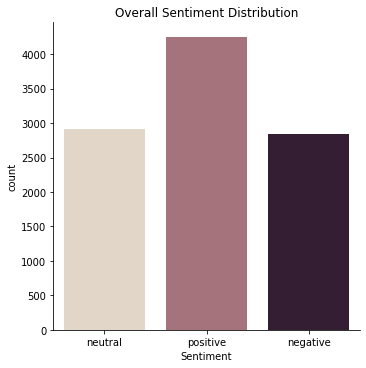

In [40]:
_ = sns.catplot(x="Sentiment", kind="count", palette="ch:.25", data=df)
_ = plt.xlabel('Sentiment')
_ = plt.title('Overall Sentiment Distribution')
plt.show()

### Correlation Between Retweet_count and Followers

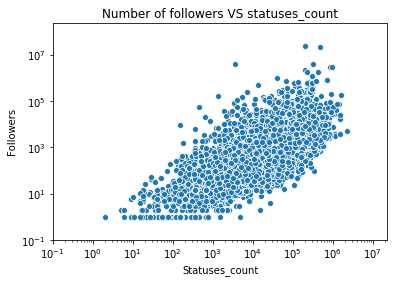

Correlation between number of followers VS statuses_count: 0.07159936275935817


In [111]:
plt.xscale('log')
plt.yscale('log')
_ = sns.scatterplot(x='Statuses_count', y='Followers', data = df)
#_.set(xscale = 'log')
plt.xlim(0.1, max(df['Statuses_count'])*10)
plt.ylim(0.1, max(df['Followers']*10))
plt.title('Number of followers VS statuses_count')
plt.show()

print('Correlation between number of followers VS statuses_count:', np.corrcoef(df['Statuses_count'].astype('float'),df['Followers'].astype('float'))[0][1])

It seems that the corelation between followers and statuses_count is not very high, which means use tweets more does not attract more followers.

## Most Frequently Words

In [128]:
text = " ".join(tweet for tweet in df.Cleaned_tweet)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 1148400 words in the combination of all tweets.


In [129]:
tokenized_sentence = text.lower().split()

In [130]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_sentence)
print(fdist)

<FreqDist with 3905 samples and 211779 outcomes>


In [131]:
fdist.most_common(2)

[('the', 11224), ('trump', 10037)]

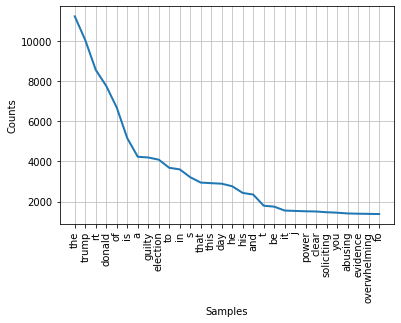

In [132]:
fdist.plot(30,cumulative=False)
plt.show()

In [152]:
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
stop_words.update(['trump', 'donald','election','rt'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62382\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
print(stop_words)

{'ours', "hasn't", 'she', 'their', 'aren', 'do', "hadn't", 'through', 'd', 'have', 'the', 'after', 'ourselves', 'up', 'for', 'against', 'when', 'we', 'more', "don't", 'can', 'donald', 'shan', 'himself', 'on', 'hasn', 'needn', 'this', 'again', 'o', 'm', 'mightn', 'y', 'now', 'having', 'why', 'yourself', 'to', 'your', 'only', 'ma', 'myself', 'that', 'very', 'down', 'here', 'until', 'same', "shan't", 'with', 'trump', 'both', 'own', 'above', 'am', 'between', 'into', 'some', "you'll", 'few', "didn't", "doesn't", 'about', 'but', 'in', "wouldn't", "aren't", 'rt', 'and', 've', 'he', 'theirs', 'below', 'from', 'don', 'its', 'been', 'which', 'under', "mustn't", 'than', 'hers', 'was', 'herself', 'while', 'will', 'election', 'who', 'over', 'further', "isn't", 'our', 'her', 'all', 'didn', 'itself', 'by', 'other', 'isn', 'haven', "needn't", "it's", 'me', 'those', 'of', 'has', 'be', "should've", 'll', "wasn't", 'or', 'a', 'once', 'wasn', "won't", 'them', 'how', 'such', 're', 'mustn', 's', 'during', '

In [154]:
filtered_sentence=[]
for w in tokenized_sentence:
    if w not in stop_words:
        filtered_sentence.append(w)
print("Tokenized Sentence:",tokenized_sentence[0:5])
print("Filterd Sentence:",filtered_sentence[0:5])

Tokenized Sentence: ['donald', 'trump', 's', 'lawyers', 'have']
Filterd Sentence: ['lawyers', 'accused', 'democrats', 'trying', 'overthrow']


In [155]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sentence:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sentence[0:5])
print("Stemmed Sentence:",stemmed_words[0:5])

Filtered Sentence: ['lawyers', 'accused', 'democrats', 'trying', 'overthrow']
Stemmed Sentence: ['lawyer', 'accus', 'democrat', 'tri', 'overthrow']


### Plot of the most frequent words about Donald Trump Election

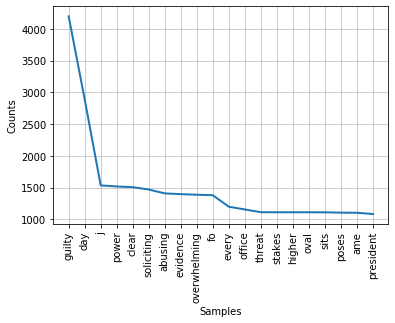

In [159]:
fdist = FreqDist(filtered_sentence)
fdist.plot(20,cumulative=False)
plt.show()

It is amazing to find out the most frequent word is 'guilty'!

### A wordcloud of most frequent words

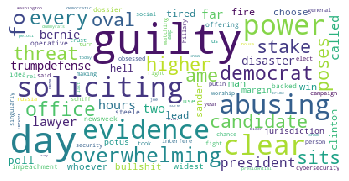

In [171]:
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white",collocations=False).generate(' '.join(filtered_sentence))

# Display the generated image:
# the matplotlib way:
#plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusion

'Guilty' and 'abusing' are two of the most common words people mentioned when they talk about topic related to "Donald Trump Election".But our sentiment distribution shows that people actually have more positive sentiment than negative senmtiment. In the future, I may dive deeper to find out the reason behind this interesting result.